Kaggle repo: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

## Business Understanding
Need to predict the house price based on the features provided

## Data Understanding
## Data Preparation
## Modelling
## Evaluation
## Deployment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
full = [train_df, test_df]

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print(train_df.columns.values)

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleTy

#### Categorical features:
MSSubClass
MSZoning
LotConfig
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Foundation
Heating
Electrical
Functional
GarageType
MiscFeature
SaleType
SaleCondition

##### Ordinal:
Street
Alley
Utilities
LotShape
LandContour
LandSlope
ExterQual
ExterCond
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
HeatingQC
CentralAir
KitchenQual
FireplaceQu
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence

#### Numerical features:
##### Discrete:
OverallQual
OverallCond
MoSold
YrSold

##### Continuous
LotFrontage
LotArea
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
Bedroom
Kitchen
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
SalePrice


'Id' 
'MSSubClass' 
'MSZoning' 
'LotFrontage' 
'LotArea' 
'Street' 
'Alley'
'LotShape' 
'LandContour' 
'Utilities' 
'LotConfig' 
'LandSlope'
'Neighborhood' 
'Condition1' 
'Condition2' 
'BldgType' 
'HouseStyle'
'OverallQual' 
'OverallCond' 
'YearBuilt' 
'YearRemodAdd' 
'RoofStyle'
'RoofMatl' 
'Exterior1st' 
'Exterior2nd' 
'MasVnrType' 
'MasVnrArea'
'ExterQual' 
'ExterCond' 
'Foundation' 
'BsmtQual'
'BsmtCond' 
'BsmtExposure'
'BsmtFinType1' 
'BsmtFinSF1' 
'BsmtFinType2'
'BsmtFinSF2' 
'BsmtUnfSF'
'TotalBsmtSF' 
'Heating' 
'HeatingQC'
'CentralAir' 
'Electrical'
'1stFlrSF'
'2ndFlrSF' 
'LowQualFinSF' 
'GrLivArea'
'BsmtFullBath'
'BsmtHalfBath'
'FullBath' 
'HalfBath' 
'BedroomAbvGr'
'KitchenAbvGr' 
'KitchenQual'
'TotRmsAbvGrd'
'Functional'
'Fireplaces' 
'FireplaceQu' 
'GarageType'
'GarageYrBlt'
'GarageFinish' 
'GarageCars' 
'GarageArea' 
'GarageQual'
'GarageCond' 
'PavedDrive' 
'WoodDeckSF' 
'OpenPorchSF'
'EnclosedPorch'
'3SsnPorch' 
'ScreenPorch'
'PoolArea' 
'PoolQC' 
'Fence'
'MiscFeature'
'MiscVal'
'MoSold' 
'YrSold' 
'SaleType' 
'SaleCondition'
'SalePrice'

In [5]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
def make_bar(col, asc, dimension):
    if(asc is not None):
        df = train_df[[col, 'SalePrice']].groupby(col).mean().sort_values('SalePrice', ascending=asc)
    else:
        df = train_df[[col, 'SalePrice']].groupby(col).mean()
    l = df['SalePrice']
    ind = np.arange(len(l))  # the x locations for the groups
    width = .6 

    fig, ax = plt.subplots(figsize=dimension)
    rects1 = ax.bar(ind, l, width)
    ax.set_xticks(ind)
    ax.set_xticklabels(df.index.values)
    plt.tight_layout()
default_dimension = (10,4)

##### Total Rooms above grade vs Sale Price
More rooms = higher sale price 

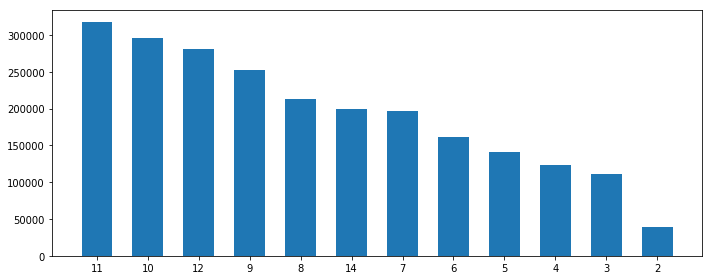

In [8]:
make_bar('TotRmsAbvGrd', False, default_dimension)

#### How many rooms are on average on the houses?

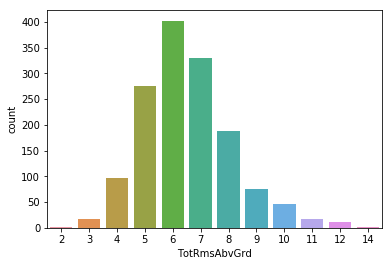

In [9]:
sns.countplot(train_df['TotRmsAbvGrd'])

#### Which proximity conditions has higher correlation with sale price ?
Houses adjacent to arterial and feeder streets are more likely to be cheapper than in other conditions while houses near or adjacent to positive off-site feature (park, greenbelt) are more likely to be more expensive.

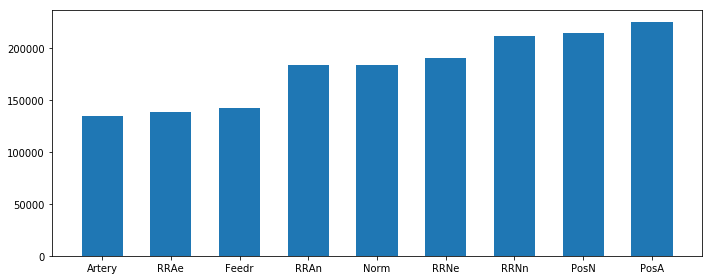

In [10]:
make_bar('Condition1', True, default_dimension)

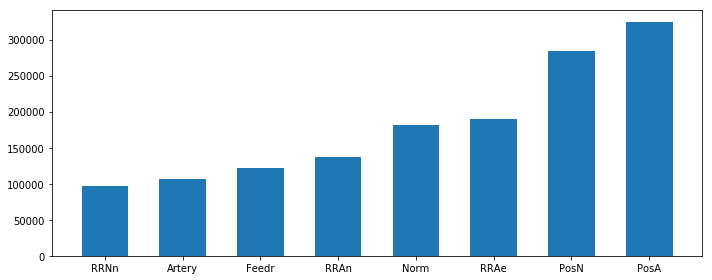

In [11]:
make_bar('Condition2', True, default_dimension)

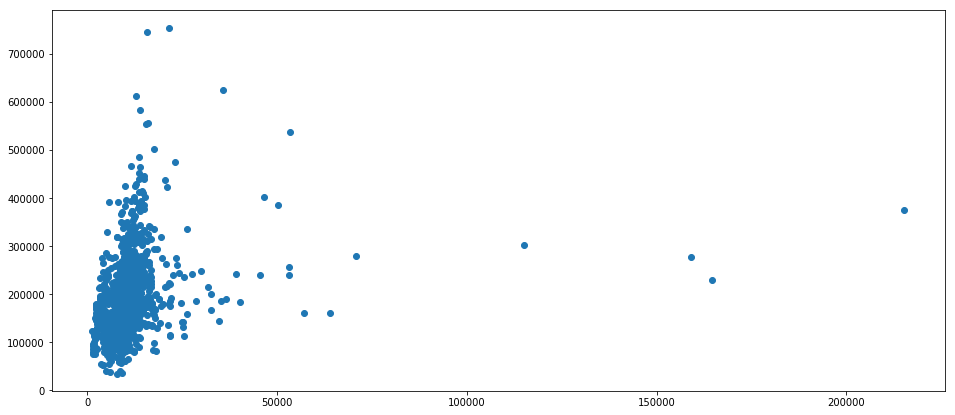

In [12]:
plt.figure(figsize=(16,7))
plt.scatter(train_df['LotArea'], train_df['SalePrice'])

#### Have the sale prices increased year-by-year ?
No

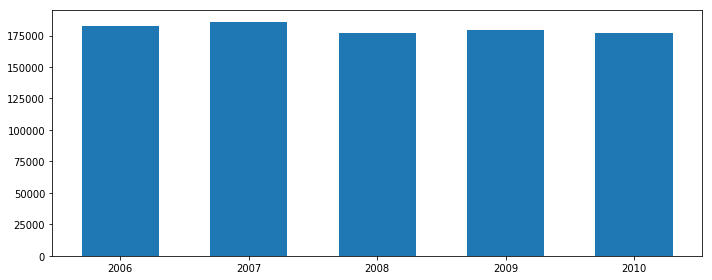

In [13]:
make_bar('YrSold', None, default_dimension)

#### What period of the year the sale price are higher?
The mean of the sale price was higher on the end of the year compared to the first semester

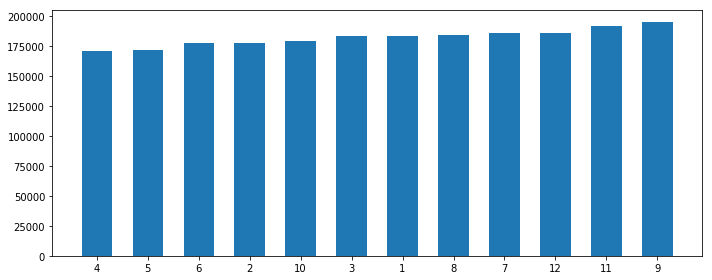

In [14]:
make_bar('MoSold', True, default_dimension)

#### Richest neighborhood?
The most expensive houses are located in Northridge, Northridge Heights and Stone Brook. The cheapest in Meador Village, Iowa DOT and Rail Road and Briardale.

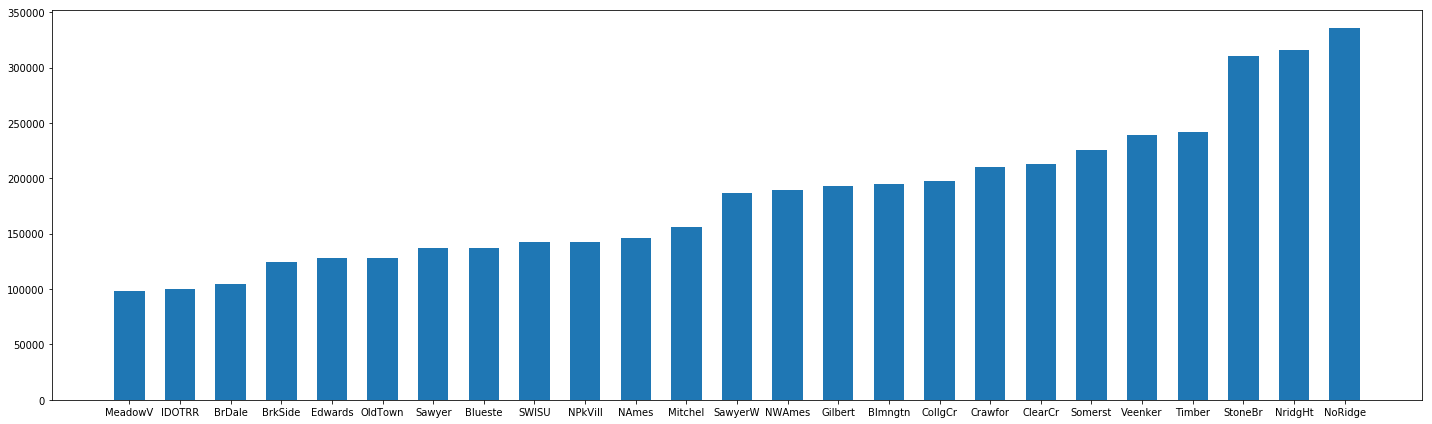

In [15]:
make_bar('Neighborhood', True, (20,6))